<a href="https://colab.research.google.com/github/Sahil9424r/Resume_Screening/blob/main/ResumeScreening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
! kaggle  datasets download -d gauravduttakiit/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
  0% 0.00/383k [00:00<?, ?B/s]
100% 383k/383k [00:00<00:00, 89.8MB/s]


In [ ]:
! unzip -o resume-dataset.zip

Archive:  resume-dataset.zip
  inflating: UpdatedResumeDataSet.csv  


In [ ]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [ ]:
df.tail(10)

,Category,Resume
952,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
953,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
954,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
955,Testing,â¢ Good logical and analytical skills â¢ Pos...
956,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Java Developer'),
  Text(1, 0, 'Testing'),
  Text(2, 0, 'DevOps Engineer'),
  Text(3, 0, 'Python Developer'),
  Text(4, 0, 'Web Designing'),
  Text(5, 0, 'HR'),
  Text(6, 0, 'Hadoop'),
  Text(7, 0, 'Blockchain'),
  Text(8, 0, 'ETL Developer'),
  Text(9, 0, 'Operations Manager'),
  Text(10, 0, 'Data Science'),
  Text(11, 0, 'Sales'),
  Text(12, 0, 'Mechanical Engineer'),
  Text(13, 0, 'Arts'),
  Text(14, 0, 'Database'),
  Text(15, 0, 'Electrical Engineering'),
  Text(16, 0, 'Health and fitness'),
  Text(17, 0, 'PMO'),
  Text(18, 0, 'Business Analyst'),
  Text(19, 0, 'DotNet Developer'),
  Text(20, 0, 'Automation Testing'),
  Text(21, 0, 'Network Security Engineer'),
  Text(22, 0, 'SAP Developer'),
  Text(23, 0, 'Civil Engineer'),
  Text(24, 0, 'Advocate')])

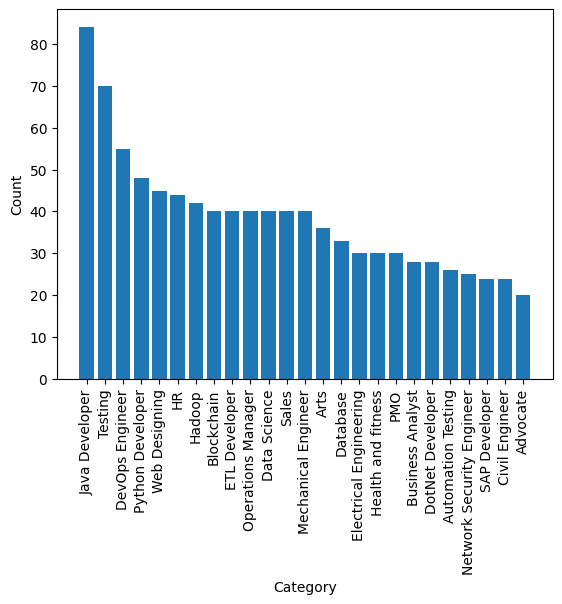

In [ ]:
plt.bar(df.Category.value_counts().index,df.Category.value_counts())
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)

<Axes: xlabel='count', ylabel='Category'>

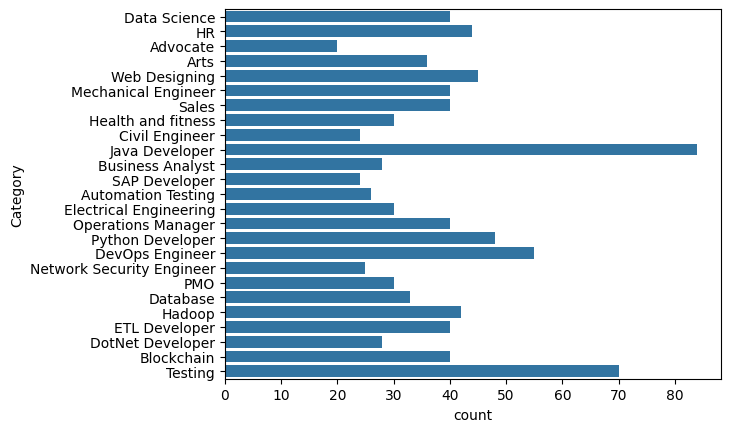

In [ ]:
sns.countplot(df.Category)

In [ ]:
df.Category.value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


In [ ]:
df.Category.unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

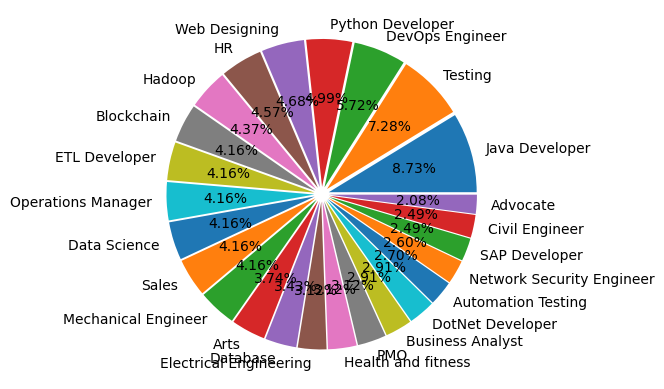

In [ ]:
plt.pie(df.Category.value_counts(),labels=df.Category.value_counts().index,autopct="%1.2f%%",explode=[0.05]*len(df.Category.value_counts()))
plt.show()

In [ ]:
df.isnull().sum()

,0
Category,0
Resume,0


In [ ]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 3. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove emails
    text = re.sub(r'\S+@\S+', '', text)

    # 5. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 6. Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # 7. Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 8. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 9. Tokenization
    tokens = text.split()

    # 10. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 11. Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 12. Join tokens back into a string
    text = ' '.join(tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['Resume']=df['Resume'].apply(preprocess_text)

In [ ]:
print(df.Resume[0])

skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate report core mem

In [ ]:
df['Resume'][0]

'skill programming language python panda numpy scipy scikitlearn matplotlib sql java javascriptjquery machine learning regression svm nave bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch dj dcjs plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learningeducation detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate report core me

In [ ]:
df.head()

,Category,Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may uitrgpv data scientis...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


In [ ]:
df.Category

,Category
0,Data Science
1,Data Science
2,Data Science
3,Data Science
4,Data Science
...,...
957,Testing
958,Testing
959,Testing
960,Testing


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
l=[]
for i in df.Resume:
  l.append(len(i))
print(max(l))

11240


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer# it is bag of words)

cv=CountVectorizer(stop_words='english') # same as CountVectorizer() khaali
# tfidf=TfidfVectorizer()
tfidf=TfidfVectorizer(stop_words='english')



In [ ]:
df.shape

(962, 2)

In [ ]:
x=cv.fit_transform(df.Resume).toarray()

In [ ]:
pickle.dump(cv,open('resumecv.pkl','wb'))

In [ ]:
y=df['Category']

In [ ]:
x.shape,y.shape

((962, 6675), (962,))

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((769, 6675), (193, 6675), (769,), (193,))

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((769, 6675), (193, 6675), (769,), (193,))

In [ ]:
# as naive baye log maante hai is text data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

0.9430051813471503
0.9687906371911573 0.9430051813471503
[22  3 18 23 15  5  3 14  6 12 23 15 16  1  9 19  0 10  9 12 22 15 20  0
  2 19 22 15  6  4  3 22 12 15  6 21  5 10 22  8 23 13 16 15 16 17  5  7
  5 20  1 24 23 12  4 11 23  3  3 18  0  8  6 11  2  4  4 20  5  8 16 11
 23 18 11  7  8 24 23 12  9 20 17  8 24 20 21 17 20  4 17  4  3 22  3  1
  8 14 19  6 23 12 10 20  3 19 14 23  5  8 24 10 13 18 21  1 12  6 15  2
 23  1  3 23 24 15  7 22 22 15 23 15  6 12 12 21 23 15 12  3 16  1 22  0
  2 10 13 15 12 16 20 18  7 17 22 12 16 17 11 17 15 18  3 18  3 16 20  9
 19 20 18 17 24  5 23 11 12 11  8  6 10 20 22 15 10 16 10 24  8 12 14 10
  3]


<Axes: >

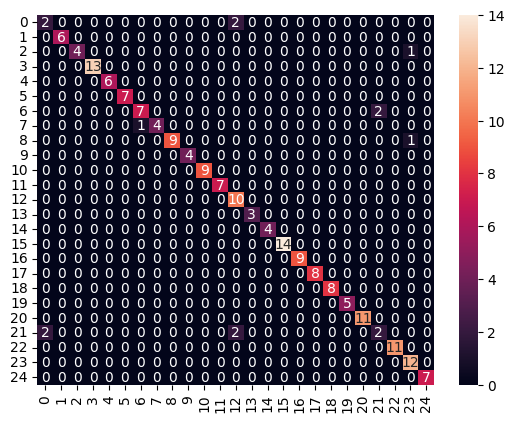

In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predk=knn.predict(x_test)
print(accuracy_score(y_test,y_predk))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print(knn.score(x_train,y_train),knn.score(x_test,y_test))
print(y_predk)
sns.heatmap(confusion_matrix(y_test,y_predk),annot=True)

1.0
1.0 1.0


<Axes: >

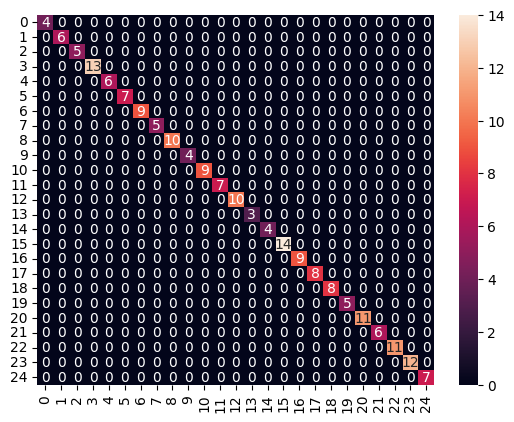

In [ ]:
g=GaussianNB()
g.fit(x_train,y_train)
y_predg=g.predict(x_test)
print(accuracy_score(y_test,y_predg))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
print(g.score(x_train,y_train),g.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test,y_predg),annot=True)

0.9948186528497409
1.0 0.9948186528497409


<Axes: >

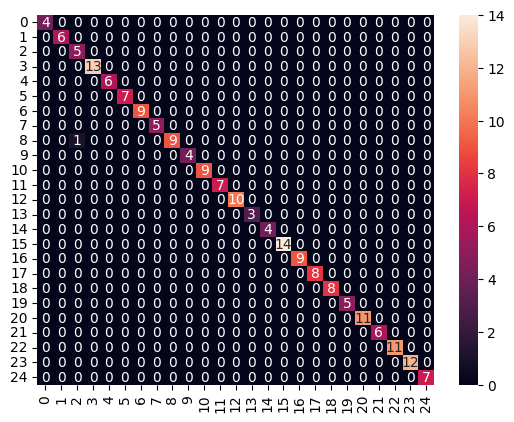

In [ ]:
l=LogisticRegression(multi_class='ovr', solver='lbfgs')
l.fit(x_train,y_train)
y_predl=l.predict(x_test)
print(accuracy_score(y_test,y_predl))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y

print(l.score(x_train,y_train),l.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test,y_predl),annot=True)

0.9948186528497409
1.0 0.9948186528497409


<Axes: >

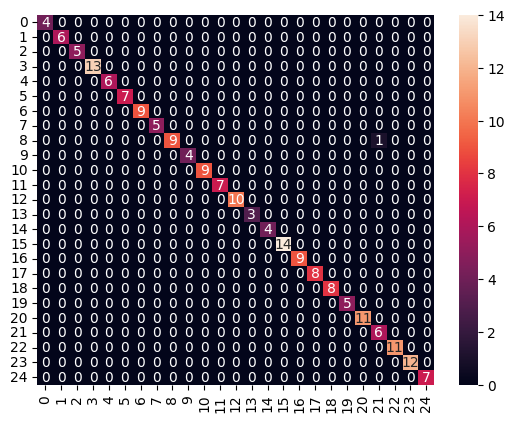

In [ ]:
r=RandomForestClassifier()
r.fit(x_train,y_train)
y_predr=r.predict(x_test)
print(accuracy_score(y_test,y_predr))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y

print(r.score(x_train,y_train),r.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test,y_predr),annot=True)

0.9948186528497409
1.0 0.9948186528497409


<Axes: >

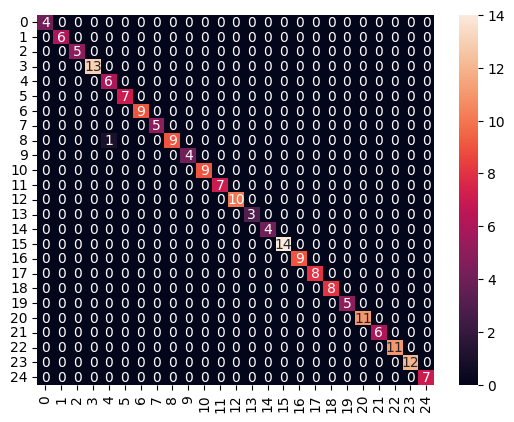

In [ ]:
m=MultinomialNB()
m.fit(x_train,y_train)
y_predm=m.predict(x_test)
print(accuracy_score(y_test,y_predm))
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y

print(r.score(x_train,y_train),r.score(x_test,y_test))
sns.heatmap(confusion_matrix(y_test,y_predm),annot=True)

In [ ]:
def predict(text,model):
  text=preprocess_text(text)
  text=cv.transform([text]).toarray()
  # model=pickle.load(open('resumel.pkl','rb'))
  pred=model.predict(text)
  # print(pred)
  print(le.inverse_transform(pred)[0])



In [ ]:
# text = """
# John Doe
# Email: john.doe@example.com
# Phone: (123) 456-7890
# LinkedIn: https://linkedin.com/in/john-doe
# Portfolio: http://johndoe.dev

# **Skills:** Python, Machine Learning, Data Science, SQL, Pandas, NumPy
# **Experience:**
# - Developed ML models for predictive analytics.
# - Built APIs using Flask!

# **Certifications:** Python (2023), Data Science-2022
# **Achievements:** Received @Best Analyst award in 2022.

# ### Projects:
# 1. Weather Prediction App (https://github.com/johndoe/weather-app)
# 2. Customer Segmentation [ML Project] (Visit: www.mlproject.com)

# ### Additional Information:
# Worked with tools like: Jupyter Notebook, Tableau...
# Special focus on NLP!!

# Thank you!!
# """
text="Experienced specializing in corporate law and legal advisory. Skilled in drafting legal documents and representing clients in court proceedings."
# text="Data Scientist skilled in machine learning, data visualization, and statistical analysis using Python and R. Proficient in tools like Tableau and Power BI."

In [ ]:
predict(text,g),predict(text,l),predict(text,knn),predict(text,r),predict(text,m)

Advocate
Advocate
HR
Advocate
Advocate


(None, None, None, None, None)

In [ ]:
import pickle
pickle.dump(g,open('resumeg.pkl','wb'))

In [ ]:
pickle.dump(le,open('resumele.pkl','wb'))

